In [345]:
import pandas as pd
import re
import numpy as np
from scipy import stats

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import datetime

# Purpose

This notebook is meant to practice analyzing one VA station at a time.

 

# The Data

In [346]:
master = pd.read_csv("Master/Master.csv")
df = master
df.head()

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Wait_Pending_1412,ID,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,SC_Wait_Complete_Increase,SC_Wait_Complete_Increase_%,MH_Wait_Pending_Increase,MH_Wait_Pending_Increase_%,MH_Wait_Complete_Increase,MH_Wait_Complete_Increase_%,Staff_To_Appts_Pending_14,Staff_To_Appts_Pending_16,Staff_To_Appts_Complete_14,Staff_To_Appts_Complete_16
0,42899,2.70%,2.51,4.07,2.77,402to,(V01) (402) HCS TOGUS ME,1293.0,1272.0,1248.0,...,-0.61,-0.182635,0.85,0.338645,0.44,0.307692,0.029907,0.033158,0.052457,0.050413
1,23709,2.16%,3.92,3.95,0.79,405wh,(V01) (405) MROC WHT RIVER JCT VT,852.0,853.0,881.0,...,0.86,0.267081,1.07,0.272959,0.48,0.571429,0.038846,0.055806,0.047889,0.054539
2,8105,5.17%,1.12,10.53,4.41,518be,(V01) (518) MC BEDFORD MA,1313.0,1265.0,1245.0,...,0.71,0.133962,-1.34,-1.196429,-2.91,-0.792916,0.154349,0.093525,0.104459,0.102658
3,85625,1.71%,1.66,3.53,3.92,523va,(V01) (523) HCS BOSTON MA,4022.0,4011.0,4041.0,...,2.58,0.813880,-0.84,-0.506024,-0.46,-0.174905,0.047089,0.051000,0.088287,0.092925
4,19511,2.64%,2.66,4.21,5.13,608ma,(V01) (608) MC MANCHESTER NH,663.0,683.0,691.0,...,-0.72,-0.197260,0.08,0.030075,-0.07,-0.023256,0.035160,0.031584,0.038942,0.042602


# Functions

In [347]:
# Marks where in a histogram the station is located. 
# Code belongs to Tony Babarino from stackoverflow.com.
# http://stackoverflow.com/questions/35890738/change-the-colour-of-a-matplotlib-histogram-bin-bar-given-a-value

def marked_hist(column,new_ax):
    p = df[column].plot(kind="hist", color='teal',bins=30, ax=new_ax)
    bar_value_to_label = float(Station[column].to_string(index=False))
    min_distance = float("inf")
    index_of_bar_to_label = 0
    for i, rectangle in enumerate(p.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
            
    x = Station[column].to_string(index=False)
    if x != 'NaN':
        p.patches[index_of_bar_to_label].set_color('red')

# The Station



In [348]:
#Station = df[df["Station"] == "573"]#Gainesville
#Station = df[df["Station"] == "358"]
#Station = df[df["Station"] == "504"]
#Station = df[df["Station"] == "664"]# San Diego
#Station = df[df["Station"] == "663"]# Seattle, WA
#Station = df[df["Station"] == "668"]# Spokane, WA
Station = df[df["Station"] == "687"]# Walla Walla, WA



station_number = Station["Station"].to_string(index=False)
#Station[["Appts_Pending_1412","Appts_Pending_1610"]]
print Station["Location"]

119    (V20) (687) Walla Walla, WA
Name: Location, dtype: object


### Marking the station

In [349]:
mark = []
for index, row in df.iterrows():
    if row["Station"] == Station["Station"].to_string(index=False):
        mark.append("mark")
    else:
        mark.append("no")
df["Mark"] = mark
    

# Appointments

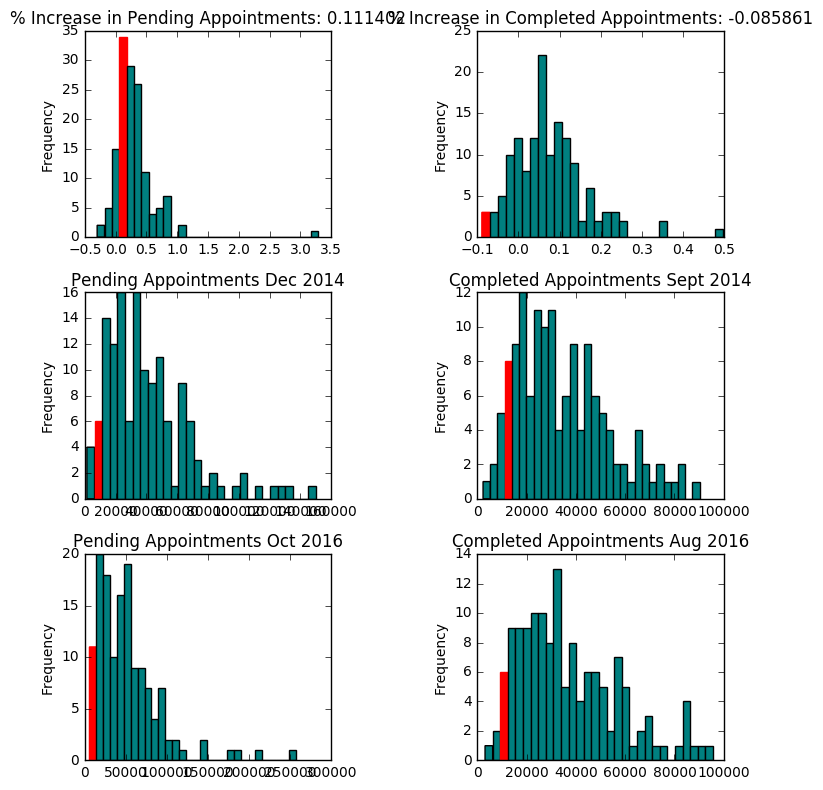

In [350]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

ax1.set_title("% Increase in Pending Appointments: "
              +Station["Pending_Increase_%"].to_string(index=False))
ax1 = marked_hist("Pending_Increase_%",ax1)
ax2.set_title("% Increase in Completed Appointments: "
              +Station["Complete_Increase_%"].to_string(index=False))
ax2 = marked_hist("Complete_Increase_%",ax2)
ax3.set_title("Pending Appointments Dec 2014")
ax3 = marked_hist("Appts_Pending_1412",ax3)
ax4.set_title("Completed Appointments Sept 2014")
ax4 = marked_hist("Appts_Complete_1409",ax4)
ax5.set_title("Pending Appointments Oct 2016")
ax5 = marked_hist("Appts_Pending_1610",ax5)
ax6.set_title("Completed Appointments Aug 2016")
ax6 = marked_hist("Appts_Complete_1608",ax6)

plt.tight_layout()

Station 687 had a smaller increase in pending appointments than the median station by -11.97 percentage points.


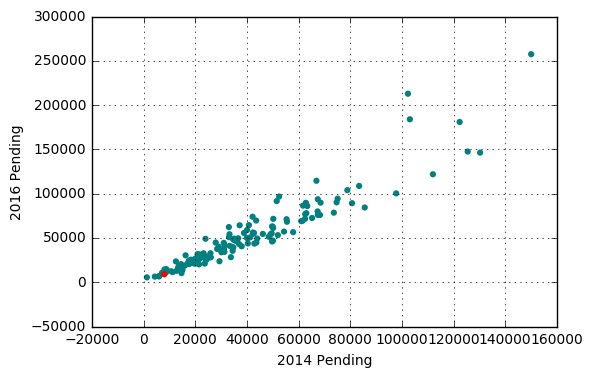

In [351]:
station_pending_increase = (float(Station["Pending_Increase_%"].to_string(index=False))*100) - (df["Pending_Increase_%"].median()*100)


if station_pending_increase > 0 :
    print "Station {} had a bigger increase in pending appointments than the median station by {} percentage points.".format(station_number,round(station_pending_increase,2))
elif station_pending_increase < 0 :
    print "Station {} had a smaller increase in pending appointments than the median station by {} percentage points.".format(station_number,round(station_pending_increase,2))





fig, ax = plt.subplots()
colors = { 'mark':'red','no':'teal'}

ax.scatter(df['Appts_Pending_1412'], df['Appts_Pending_1610'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none')
ax.set_ylabel("2016 Pending")
ax.set_xlabel("2014 Pending")
ax.grid()
plt.show()

Station 687 had a smaller increase in  appointments than the median station by -15.1 percentage points.


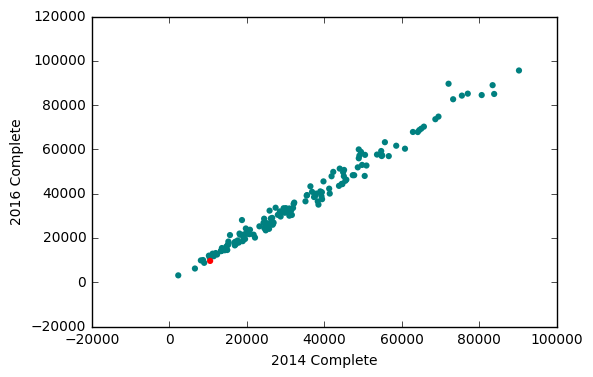

In [352]:
station_complete_increase = (float(Station["Complete_Increase_%"].to_string(index=False))*100) - (df["Complete_Increase_%"].median()*100)


if station_complete_increase > 0 :
    print "Station {} had a bigger increase in  appointments than the median station by {} percentage points.".format(station_number, round((station_complete_increase),2))
elif station_complete_increase < 0 :
    print "Station {} had a smaller increase in  appointments than the median station by {} percentage points.".format(station_number, round((station_complete_increase),2))

fig, ax = plt.subplots()
colors = { 'mark':'red','no':'teal'}

ax.scatter(df['Appts_Complete_1409'],df['Appts_Complete_1608'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none')
ax.set_ylabel("2016 Complete")
ax.set_xlabel("2014 Complete")

plt.show()

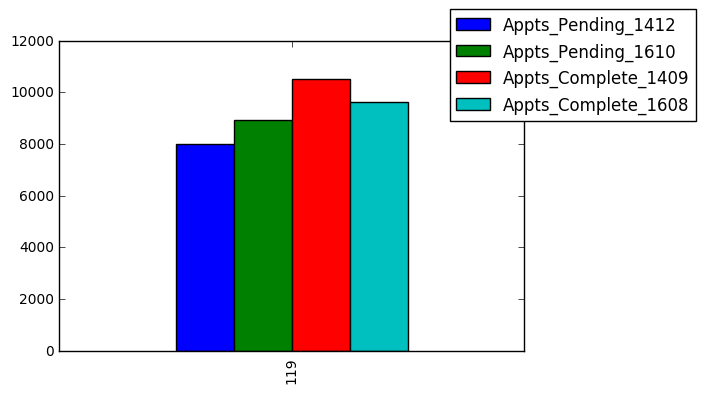

In [353]:
ax = Station[["Appts_Pending_1412","Appts_Pending_1610","Appts_Complete_1409","Appts_Complete_1608"]].plot(kind="bar",)
plt.legend(bbox_to_anchor=(1.2, 1),
           bbox_transform=plt.gcf().transFigure)

# Wait Times

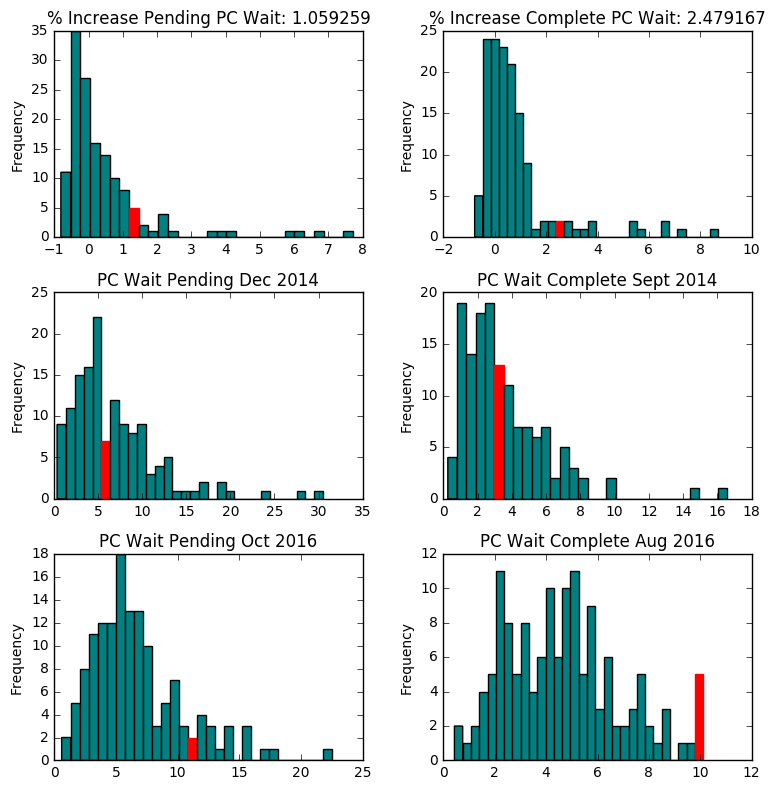

In [354]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

ax1.set_title("% Increase Pending PC Wait: "
              +Station["PC_Wait_Pending_Increase_%"].to_string(index=False))
ax1 = marked_hist("PC_Wait_Pending_Increase_%",ax1)

ax2.set_title("% Increase Complete PC Wait: "
              +Station["PC_Wait_Complete_Increase_%"].to_string(index=False))
ax2 = marked_hist("PC_Wait_Complete_Increase_%",ax2)

ax3.set_title("PC Wait Pending Dec 2014")
ax3 = marked_hist("PC_Wait_Pending_1412",ax3)

ax4.set_title("PC Wait Complete Sept 2014")
ax4 = marked_hist("PC_Wait_Complete_1409",ax4)

ax5.set_title("PC Wait Pending Oct 2016")
ax5 = marked_hist("PC_Wait_Pending_1610",ax5)

ax6.set_title("PC Wait Complete Aug 2016")
ax6 = marked_hist("PC_Wait_Complete_1608",ax6)

plt.tight_layout()

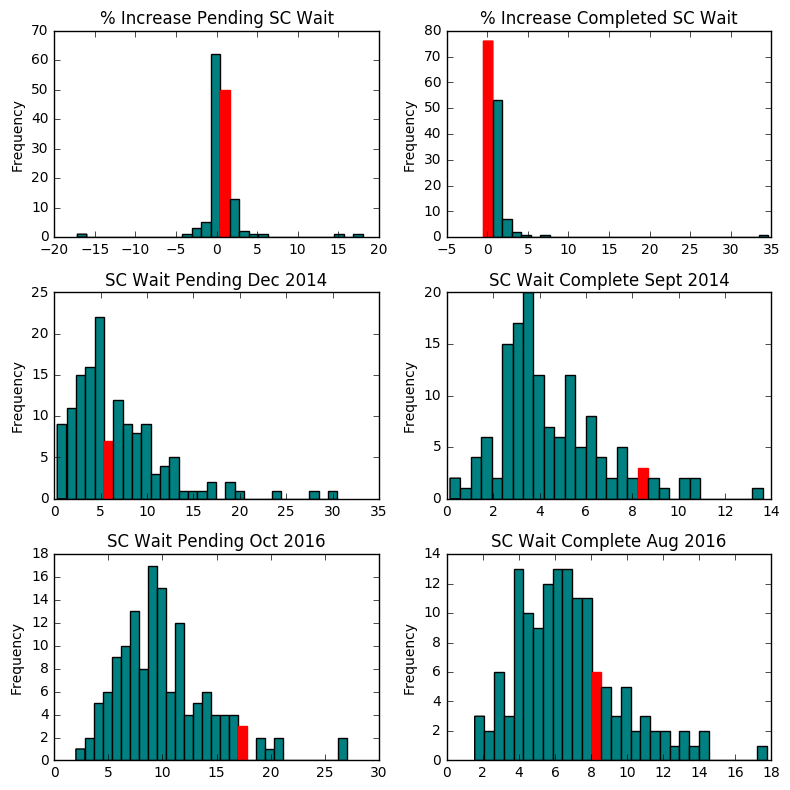

In [355]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

ax1.set_title("% Increase Pending SC Wait")
ax1 = marked_hist("SC_Wait_Pending_Increase_%",ax1)

ax2.set_title("% Increase Completed SC Wait")
ax2 = marked_hist("SC_Wait_Complete_Increase_%",ax2)

ax3.set_title("SC Wait Pending Dec 2014")
ax3 = marked_hist("PC_Wait_Pending_1412",ax3)

ax4.set_title("SC Wait Complete Sept 2014")
ax4 = marked_hist("SC_Wait_Complete_1409",ax4)

ax5.set_title("SC Wait Pending Oct 2016")
ax5 = marked_hist("SC_Wait_Pending_1610",ax5)

ax6.set_title("SC Wait Complete Aug 2016")
ax6 = marked_hist("SC_Wait_Complete_1608",ax6)

plt.tight_layout()

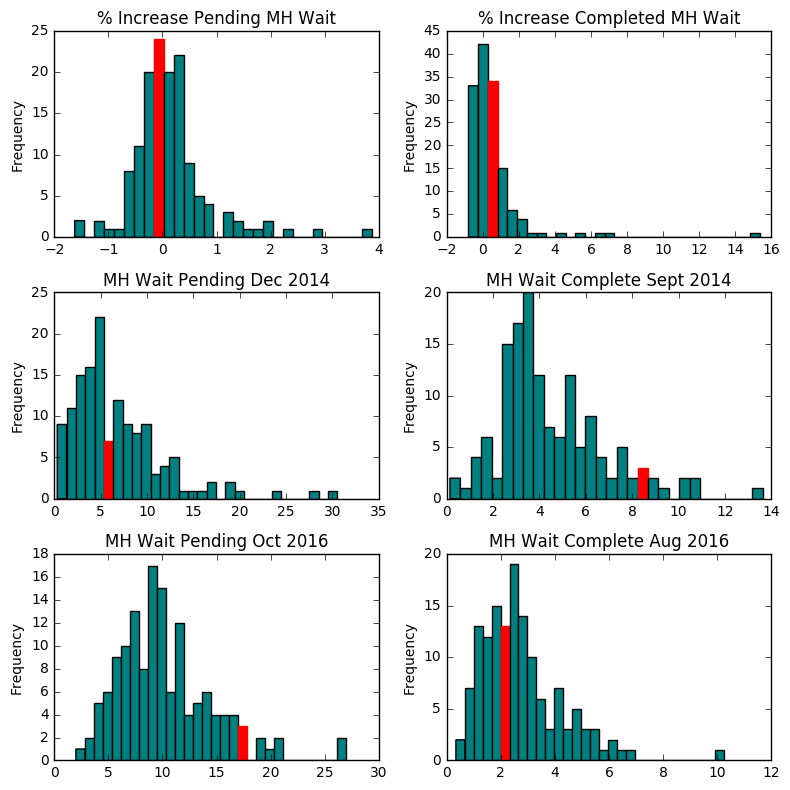

In [356]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

ax1.set_title("% Increase Pending MH Wait")
ax1 = marked_hist("MH_Wait_Pending_Increase_%",ax1)

ax2.set_title("% Increase Completed MH Wait")
ax2 = marked_hist("MH_Wait_Complete_Increase_%",ax2)

ax3.set_title("MH Wait Pending Dec 2014")
ax3 = marked_hist("PC_Wait_Pending_1412",ax3)

ax4.set_title("MH Wait Complete Sept 2014")
ax4 = marked_hist("SC_Wait_Complete_1409",ax4)

ax5.set_title("MH Wait Pending Oct 2016")
ax5 = marked_hist("SC_Wait_Pending_1610",ax5)

ax6.set_title("MH Wait Complete Aug 2016")
ax6 = marked_hist("MH_Wait_Complete_1608",ax6)

plt.tight_layout()

In [357]:
df.columns

Index([u'Appts_Pending_1412', u'%_Appts_Over_30_Pending_1412',
       u'PC_Wait_Pending_1412', u'SC_Wait_Pending_1412',
       u'MH_Wait_Pending_1412', u'ID', u'ORGANIZATION', u'MAY-FY11',
       u'MAY-FY12', u'MAY-FY13', u'MAY-FY14', u'MAY-FY15', u'MAY-FY16',
       u'Appts_Pending_1610', u'%_Appts_Over_30_Pending_1610',
       u'PC_Wait_Pending_1610', u'SC_Wait_Pending_1610',
       u'MH_Wait_Pending_1610', u'Appts_Complete_1608',
       u'%_Appts_Over_30_Complete_1608', u'PC_Wait_Complete_1608',
       u'SC_Wait_Complete_1608', u'MH_Wait_Complete_1608', u'Station',
       u'Location', u'for_dups', u'Choice_Hires', u'Interim', u'Vacancy',
       u'%_Appts_Over_30_Complete_1409', u'Appts_Complete_1409',
       u'MH_Wait_Complete_1409', u'PC_Wait_Complete_1409',
       u'SC_Wait_Complete_1409', u'Physician_Turnover_FY11',
       u'Physician_Turnover_FY12', u'Physician_Turnover_FY13',
       u'Physician_Turnover_FY14', u'Physician_Turnover_FY15',
       u'Pending_Increase', u'Pending_In

In [358]:
Station["PC_Wait_Complete_Increase_%"]

119    2.479167
Name: PC_Wait_Complete_Increase_%, dtype: float64

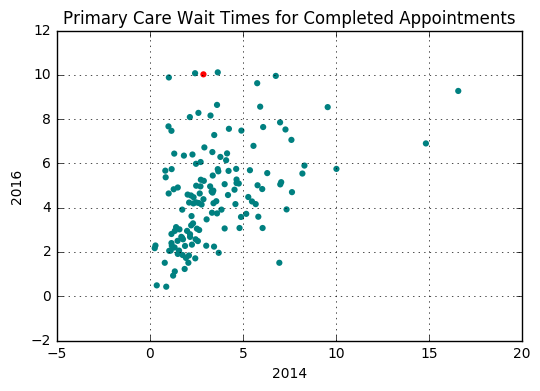

In [359]:
fig, ax = plt.subplots()
colors = { 'mark':'red','no':'teal'}

ax.scatter(df['PC_Wait_Complete_1409'], df['PC_Wait_Complete_1608'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none')
ax.set_ylabel("2016")
ax.set_xlabel("2014")
ax.set_title("Primary Care Wait Times for Completed Appointments")
ax.grid()
plt.show()

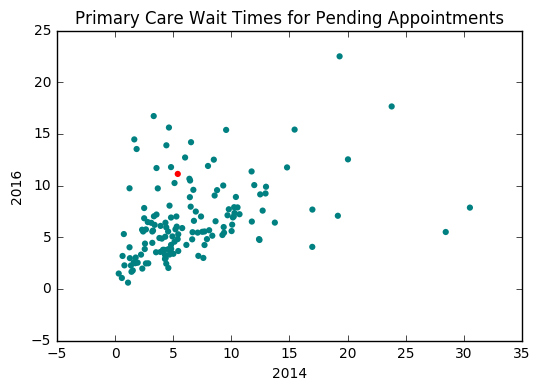

In [360]:
fig, ax = plt.subplots()
colors = { 'mark':'red','no':'teal'}

ax.scatter(df['PC_Wait_Pending_1412'], df['PC_Wait_Pending_1610'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none')
ax.set_ylabel("2016")
ax.set_xlabel("2014")
ax.set_title("Primary Care Wait Times for Pending Appointments")
plt.show()

In [361]:
station_pc_wait_pending_increase = (float(Station["PC_Wait_Pending_Increase_%"].to_string(index=False))*100) - (df["PC_Wait_Pending_Increase_%"].median()*100)

if station_complete_increase > 0 :
    print "Station {} had a bigger increase in  than the median station by {} percentage points.".format(station_number, round((station_pc_wait_pending_increase),2))
elif station_complete_increase < 0 :
    print "Station {} had a smaller increase in  than the median station by {} percentage points.".format(station_number, round((station_pc_wait_pending_increase),2))





Station 687 had a smaller increase in  than the median station by 105.64 percentage points.


# Hiring

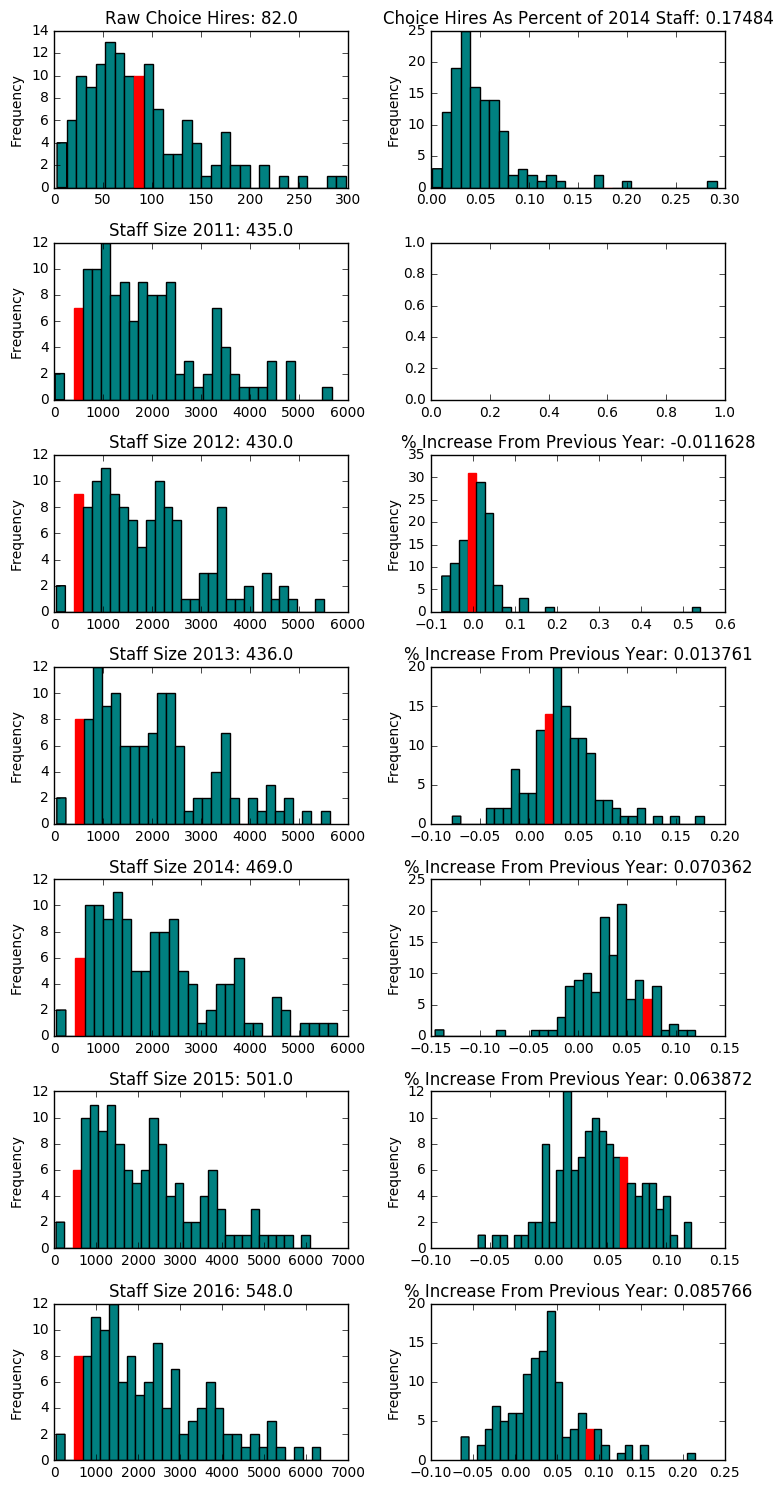

In [362]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8),(ax9, ax10),(ax11, ax12),(ax13, ax14)) = plt.subplots(nrows=7, ncols=2, figsize=(8,15))

ax1.set_title("Raw Choice Hires: "+Station["Choice_Hires"].to_string(index=False))
ax1 = marked_hist("Choice_Hires",ax1)

ax2.set_title("Choice Hires As Percent of 2014 Staff: "+Station["Choice_Increase_%"].to_string(index=False))
ax2 = marked_hist("Choice_Increase_%",ax2)

ax3.set_title("Staff Size 2011: "+Station["MAY-FY11"].to_string(index=False))
ax3 = marked_hist("MAY-FY11", ax3)

ax5.set_title("Staff Size 2012: "+Station["MAY-FY12"].to_string(index=False))
ax5 = marked_hist("MAY-FY12", ax5)

ax6.set_title("% Increase From Previous Year: "+Station["Staff_11_To_12_Increase_%"].to_string(index=False))
ax6 = marked_hist("Staff_11_To_12_Increase_%",ax6)

ax7.set_title("Staff Size 2013: "+Station["MAY-FY13"].to_string(index=False))
ax7 = marked_hist("MAY-FY13", ax7)

ax8.set_title("% Increase From Previous Year: "+Station["Staff_12_To_13_Increase_%"].to_string(index=False))
ax8 = marked_hist("Staff_12_To_13_Increase_%",ax8)

ax9.set_title("Staff Size 2014: "+Station["MAY-FY14"].to_string(index=False))
ax9 = marked_hist("MAY-FY14", ax9)

ax10.set_title("% Increase From Previous Year: "+Station["Staff_13_To_14_Increase_%"].to_string(index=False))
ax10 = marked_hist("Staff_13_To_14_Increase_%",ax10)

ax11.set_title("Staff Size 2015: "+Station["MAY-FY15"].to_string(index=False))
ax11 = marked_hist("MAY-FY15", ax11)

ax12.set_title("% Increase From Previous Year: "+Station["Staff_14_To_15_Increase_%"].to_string(index=False))
ax12 = marked_hist("Staff_14_To_15_Increase_%",ax12)

ax13.set_title("Staff Size 2016: "+Station["MAY-FY16"].to_string(index=False))
ax13 = marked_hist("MAY-FY16", ax13)

ax14.set_title("% Increase From Previous Year: "+Station["Staff_15_To_16_Increase_%"].to_string(index=False))
ax14 = marked_hist("Staff_15_To_16_Increase_%",ax14)

plt.tight_layout()

In [363]:
Station["Choice_Increase_%"]

119    0.17484
Name: Choice_Increase_%, dtype: float64

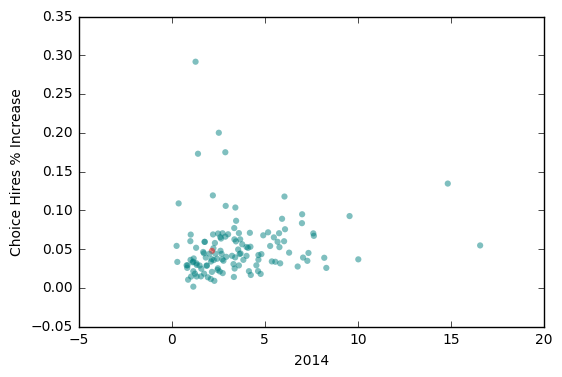

In [364]:
fig, ax = plt.subplots()
colors = { 'mark':'red','no':'teal'}

ax.scatter(df['PC_Wait_Complete_1409'], df['Choice_Increase_%'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none',alpha=.5)
ax.set_ylabel("Choice Hires % Increase")
ax.set_xlabel("2014")
#ax.set_title("Primary Care Wait Times for Completed Appointments")
plt.show()

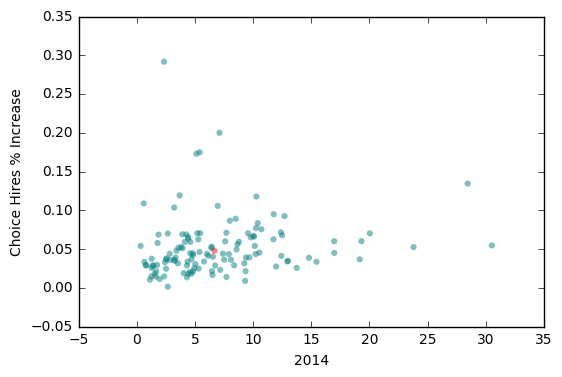

In [365]:
fig, ax = plt.subplots()
colors = { 'mark':'red','no':'teal'}

ax.scatter(df['PC_Wait_Pending_1412'], df['Choice_Increase_%'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none',alpha=.5)
ax.set_ylabel("Choice Hires % Increase")
ax.set_xlabel("2014")
#ax.set_title("Primary Care Wait Times for Completed Appointments")
plt.show()

# Turnover

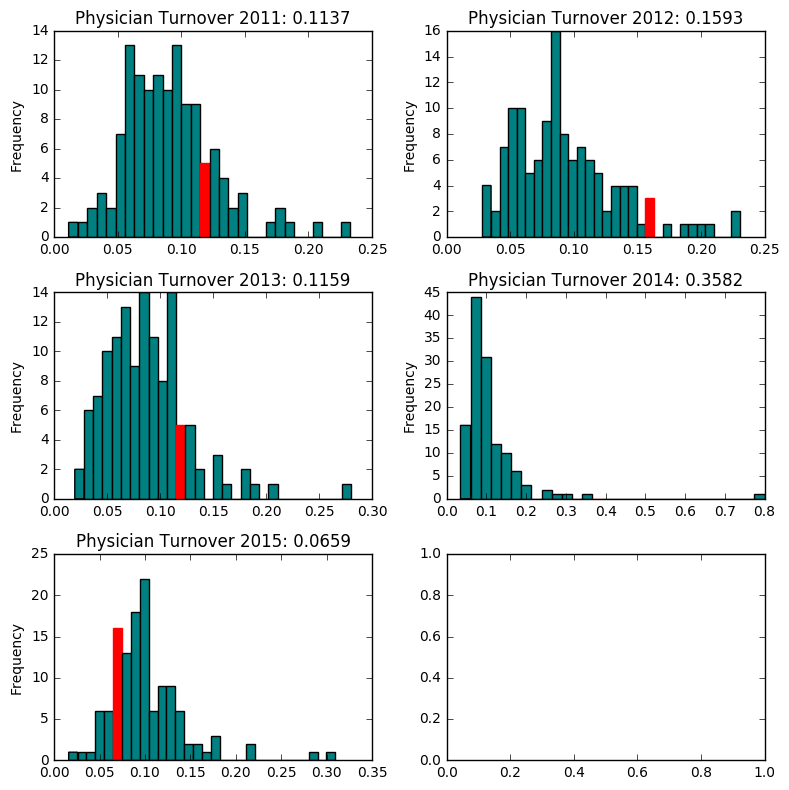

In [366]:
fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, sharex=False,figsize=(8,8))

ax1.set_title("Physician Turnover 2011: " 
              +Station["Physician_Turnover_FY11"].to_string(index=False))
ax1 = marked_hist("Physician_Turnover_FY11",ax1)

ax2.set_title("Physician Turnover 2012: " 
              +Station["Physician_Turnover_FY12"].to_string(index=False))
ax2 = marked_hist("Physician_Turnover_FY12",ax2)

ax3.set_title("Physician Turnover 2013: " 
              +Station["Physician_Turnover_FY13"].to_string(index=False))
ax3 = marked_hist("Physician_Turnover_FY13",ax3)

ax4.set_title("Physician Turnover 2014: "
              +Station["Physician_Turnover_FY14"].to_string(index=False))
ax4 = marked_hist("Physician_Turnover_FY14",ax4)

ax5.set_title("Physician Turnover 2015: "
              +Station["Physician_Turnover_FY15"].to_string(index=False))
ax5 = marked_hist("Physician_Turnover_FY15",ax5)

plt.tight_layout()

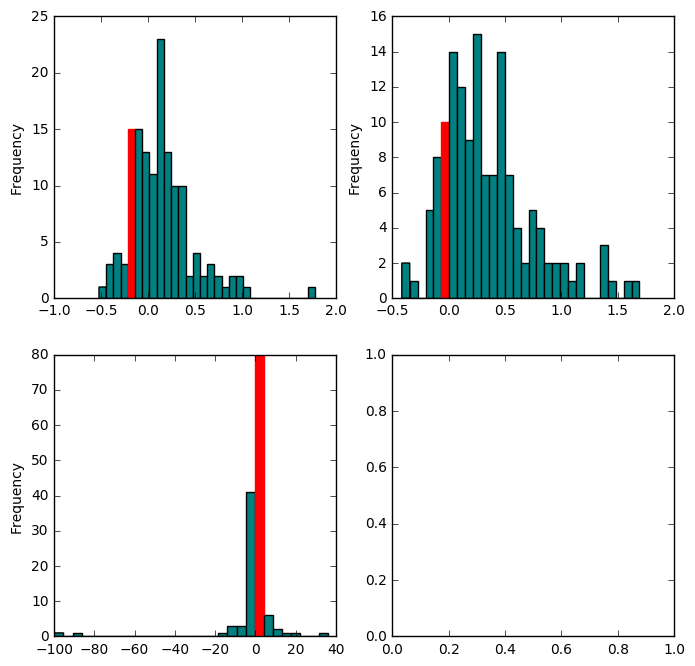

In [367]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False,figsize=(8,8))

marked_hist("Complete_Pending_Appts_Diff_14_%",ax1)
marked_hist("Complete_Pending_Appts_Diff_16_%",ax2)
marked_hist("Complete_Pending_Gap_Increase_%",ax3)

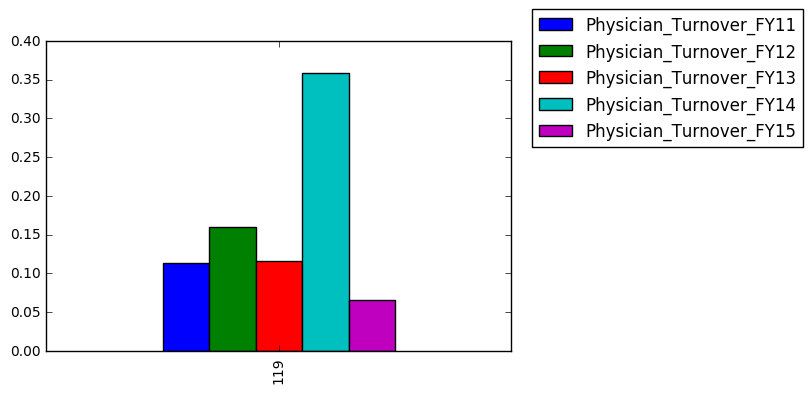

In [368]:
Station[["Physician_Turnover_FY11","Physician_Turnover_FY12","Physician_Turnover_FY13","Physician_Turnover_FY14","Physician_Turnover_FY15"]].plot(kind='bar')

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

In [369]:
def marked_hist(column,new_ax):
    p = df[column].plot(kind="hist", color='teal',bins=30, ax=new_ax)
    bar_value_to_label = float(Station[column].to_string(index=False))
    min_distance = float("inf")
    index_of_bar_to_label = 0
    for i, rectangle in enumerate(p.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
            
    x = Station[column].to_string(index=False)
    if x != 'NaN':
        p.patches[index_of_bar_to_label].set_color('red')
marked_hist("Choice_Increase_%",ax)

In [370]:
def marked_hist(column,new_ax):
    p = df[column].plot(kind="hist", color='teal',bins=30, ax=new_ax)
    bar_value_to_label = float(Station[column].to_string(index=False))
    min_distance = float("inf")
    index_of_bar_to_label = 0
    for i, rectangle in enumerate(p.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
            
    x = Station[column].to_string(index=False)
    if x != 'NaN':
        p.patches[index_of_bar_to_label].set_color('red')
marked_hist("Choice_Increase_%",ax)

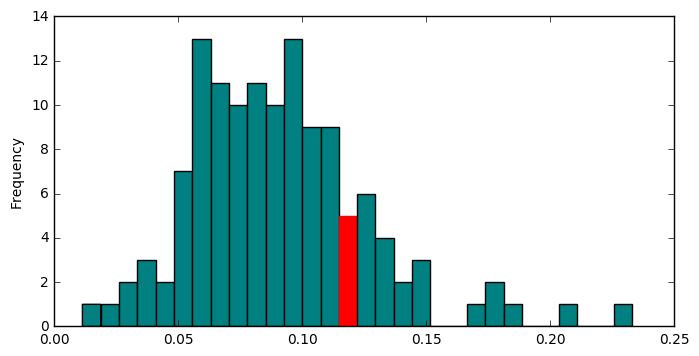

In [378]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=False,figsize=(8,4))

marked_hist("Physician_Turnover_FY11",ax1)

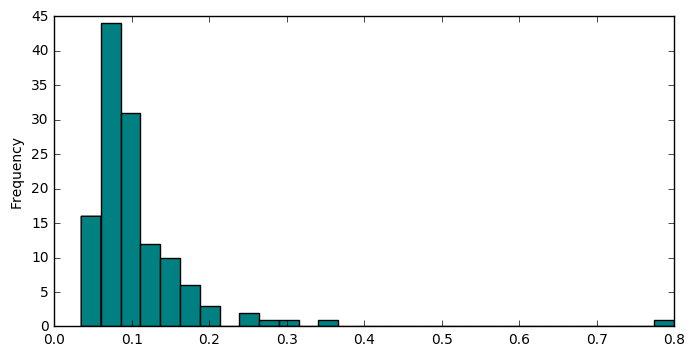

In [379]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=False,figsize=(8,4))

marked_hist("Physician_Turnover_FY14",ax1)

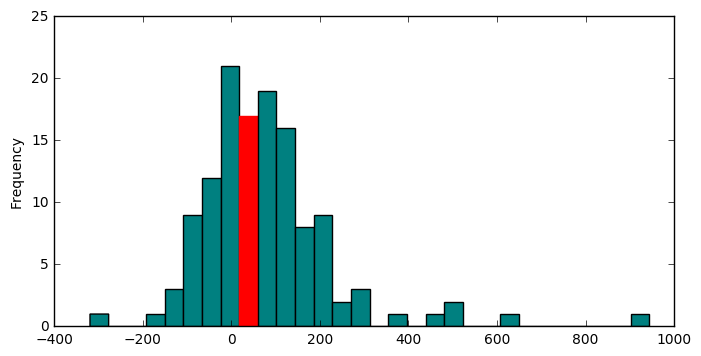

In [380]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=False,figsize=(8,4))

marked_hist("Choice_Staff_Dif",ax1)